┌ Info: Saved animation to 
│   fn = C:\Users\karol\Desktop\programowanie\animacja.gif
└ @ Plots C:\Users\karol\.julia\packages\Plots\kyYZF\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\karol\\Desktop\\programowanie\\animacja.gif")
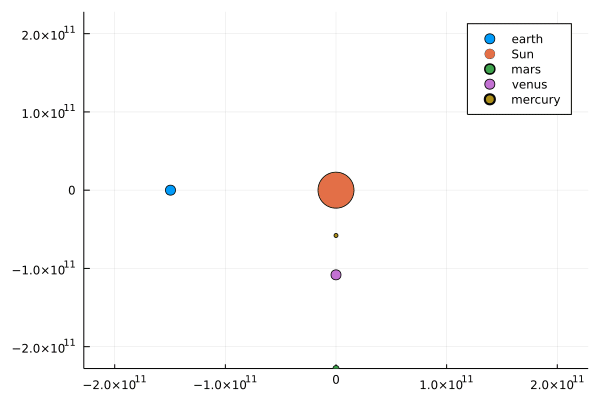

In [1]:
# Główny program do obliczania położenia ciał ( dla ukladu slonecznego )

using Plots, AstroLib


# Ważne stałe
G = 6.6732*10^(-11)     # stała grawitacji 
MS = 1.99e30    #masa slonca
RS = 695000000.0 #promień slonca
scale = 700.0

#lista planet które chcemy wyswietlić - mozna pozniej zautomatyzwac zaladowanie slowniknów
planet_names = ["earth", "mars", "venus", "mercury"]

#dla listy planet bierzemy dane z AstroLib
function get_axis(planet_names)
    [AstroLib.planets[i].axis for i in planet_names]
end

function get_mass(planet_names)
   [AstroLib.planets[i].mass for i in planet_names]
end

function get_radius(planet_names)
    [AstroLib.planets[i].radius for i in planet_names]
end

masses = get_mass(planet_names)
axis = get_axis(planet_names)
radius = get_radius(planet_names)

#wyznaczamy granice wykresy dla najdalszej planety 
xlimit = axis[1]
for i in 2:length(axis)
    if xlimit < axis[i] 
        xlimit = axis[i]
    end     
end

xlimit += 1e5
# Parametry początkowe obiektów - uwaga mam problem z wyznaczeniem vektoru momentu początkowego - troche na chybil traf,
#skalowanie planet sluży tylko do ich pokazania, tzn jowisz może wyjść większy od słońca wiec trzeba nad tym popracować
Planeta1 = Dict("M" => masses[1], 
    "position" => [-axis[1],0], 
      "moment_vec" => masses[1] * [0,30e3],"radiusscaled" => radius[1]/RS*scale)

#sqrt(G*masses[1]^2/(axis[1]*(MS+masses[1])))

#uwaga - na razie słonće to zawsze planeta nr 2
Planeta2 = Dict("M" => MS, "position" => [0.0,0.0], "moment_vec" => [0.0,0.0],"radiusscaled" => 20.0)

Planeta3 = Dict("M" => masses[2], "position" => [0,-axis[2]],"moment_vec" => masses[2]* [-24e3,0]
,"radiusscaled" => radius[2]/RS*scale)
#-sqrt(G*masses[2]^2/(axis[2]*(MS+masses[2])))
Planeta4 = Dict("M" => masses[3], "position" => [0,-axis[3]],"moment_vec" => masses[3]* [-35e3,0]
,"radiusscaled" => radius[3]/RS*scale)
Planeta5 = Dict("M" => masses[4], "position" => [0,-axis[4]],"moment_vec" => masses[4]* [-45e3,0]
,"radiusscaled" => radius[4]/RS*scale)
#uwaga jak dolozymy planete trzeba uzupelnic slownik oraz dopisac do listy ponizej

lista=[Planeta1, Planeta2,Planeta3,Planeta4,Planeta5]
#---------------------------------------------------------------------------------------------
#       FUNKCJE DO OBLICZEŃ 
#---------------------------------------------------------------------------------------------

dist_vec(coord1,coord2) = coord2 .- coord1
"""Wylicza wektor odległości z coord1 do coord2"""

vec_length(v::Array) = sqrt(sum(v.^2))
"""Wylicza długość wektora"""

F_gravity(M1::Number,M2::Number,r::Array) = (G*M1*M2/vec_length(r)^3).*r
"""Wylicza wektor siły grawitacji"""


        


#-------------------------------------------------------------------------------------------
#               RYSOWANIE WYKRESU
#-------------------------------------------------------------------------------------------



fps = 20          # ilość kaltek na sekundę w symulacji

#czy to jest ilość klatek?
t = 1:2000
# Uwaga to jest delta t - im wieksza to obliczenia mniej dokladne ale nie moze byc za mala bo komp tego nie udzwignie
Deltat = 30000

symulation = @animate for k in t
    # rysuj pierwszą planetę
    scatter([lista[1]["position"][1]],[lista[1]["position"][2]],
    xlim = (-xlimit,xlimit),
    ylim = (-xlimit,xlimit),
    markersize = lista[1]["radiusscaled"],
    label = planet_names[1])
    #rysuj pozostałe planety/slonce 
    for j in 2:length(lista)
        name = planet_names[j-1]
        if j == 2
            name = "Sun"
        end    
        scatter!([lista[j]["position"][1]],[lista[j]["position"][2]],
        markersize = lista[j]["radiusscaled"],
        label = name)
    end    
    
      for i in 1 : length(lista)
        FG=[0.0,0.0]
            #oblicz siłe przeciągania dla planety i
           for j in 1:length(lista)
               if j!=i
                 r=dist_vec(get(lista[i],"position",1),get(lista[j],"position",1))
                 F=F_gravity(get(lista[i],"M",1),get(lista[j],"M",1),r)
                FG .+= F
                end
            end 
        #updtejtuj wektor momentu pędu dla i=tej planety
        lista[i]["moment_vec"] = lista[i]["moment_vec"] .+ FG*Deltat
        #updejtuj wektor pozycji dla i-tej planety
        lista[i]["position"] = lista[i]["position"] .+ lista[i]["moment_vec"]*Deltat/lista[i]["M"]
         
            
        end

end

gif(symulation,"animacja.gif",fps=fps)